<a href="https://colab.research.google.com/github/musiur/preprocess_salary_dataset/blob/main/data-cleaning-salary-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Try setting error_bad_lines=False to skip bad lines
df = pd.read_csv('job_descriptions.csv', engine="python", on_bad_lines='warn')

# Print the column names to check if 'description' exists and if not what the correct name is
print(df.columns)

# Assuming the column is named 'job_description' based on the provided global variables
# salary_range_count = df['job_description'].str.contains(r'\$\d+,\d+ - \$\d+,\d+|\$\d+ - \$\d+').sum()

# print(f"Number of tuples with salary range: {salary_range_count}")


Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')


In [4]:
df.shape

(103962, 23)

In [5]:
print(df.describe())

             Job Id       latitude      longitude   Company Size
count  1.039620e+05  103962.000000  103962.000000  103961.000000
mean   1.548761e+15      19.295946      16.351818   73708.508017
std    8.965730e+14      23.583259      70.903894   35304.220838
min    1.817948e+11     -40.900600    -175.198200   12646.000000
25%    7.685800e+14       4.860400     -15.310100   42909.000000
50%    1.551385e+15      18.042500      19.374400   73618.000000
75%    2.321912e+15      39.074200      48.516400  104371.000000
max    3.099561e+15      71.706900     178.065000  134834.000000


In [6]:
print(len(df))

103962


In [8]:
df.tail()


,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
103957,238086201272145,1 to 9 Years,BA,$64K-$124K,Manama,Bahrain,26.0667,50.5577,Contract,25449.0,...,(922)488-8186x4349,Software Tester,Automation Tester,USAJOBS,An Automation Tester uses automated testing to...,"{'Transportation Benefits, Professional Develo...","Test automation tools (e.g., Selenium, Appium)...",Implement and maintain test automation framewo...,Eastman Chemical,"{""Sector"":""Chemicals"",""Industry"":""Chemicals"",""..."
103958,469166369709,4 to 11 Years,M.Tech,$64K-$98K,Kingstown,St. Vincent and the Grenadines,12.9843,-61.2872,Contract,100420.0,...,891-834-6272x627,Key Account Manager,Strategic Account Manager,Dice,Strategic Account Managers nurture relationshi...,"{'Transportation Benefits, Professional Develo...",Account management Client relationship Sales s...,"Focus on strategic planning for key accounts, ...",Adani Enterprises,"{""Sector"":""Conglomerate"",""Industry"":""Conglomer..."
103959,755769123082209,5 to 8 Years,M.Tech,$62K-$88K,Santiago,Chile,-35.6751,-71.5429,Intern,16620.0,...,(832)450-8180x0963,Supply Chain Manager,Demand Planner,Idealist,A Demand Planner analyzes historical sales dat...,"{'Employee Assistance Programs (EAP), Tuition ...",Demand forecasting Inventory management Data a...,Analyze demand patterns and market trends to f...,The Coca-Cola Company,"{""Sector"":""Food and Beverage"",""Industry"":""Beve..."
103960,1950208792290670,4 to 8 Years,PhD,$59K-$86K,Manama,Bahrain,26.0667,50.5577,Contract,59842.0,...,(267)577-8366x5871,Electrical Engineer,Controls Engineer,Idealist,Controls Engineers specialize in industrial au...,"{'Casual Dress Code, Social and Recreational A...",Control system design PLC programming Automati...,Design and implement control systems for indus...,Keurig Dr Pepper Inc.,"{""Sector"":""Beverage"",""Industry"":""Food and Beve..."
103961,2341938800473327,4 to 15 Years,BBA,$60K-$117K,Roseau,Dominica,15.4149,-61.3705,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None


In [9]:
df.shape

(103962, 23)

Data Clening


In [10]:
df.isnull()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103957,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

,0
Job Id,0
Experience,0
Qualifications,0
Salary Range,0
location,0
Country,0
latitude,0
longitude,0
Work Type,1
Company Size,1


In [12]:
df.isnull().sum().sum()

373

In [13]:
df.shape

(103962, 23)

In [14]:
df=df.dropna()

In [15]:
df.shape

(103603, 23)

In [ ]:
df.isnull().sum()

,0
Job Id,0
Experience,0
Qualifications,0
Salary Range,0
location,0
Country,0
latitude,0
longitude,0
Work Type,0
Company Size,0


duplicates

In [16]:
df[df.duplicated()]

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile


In [ ]:
df.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')

Outliers


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Experience'>

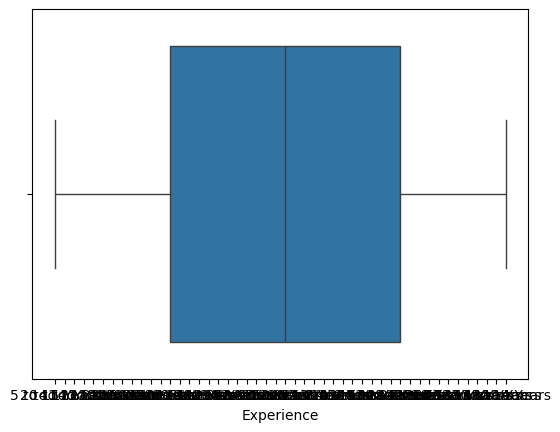

In [18]:
import seaborn as sns
sns.boxplot(x=df['Experience'])

In [35]:
df.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')

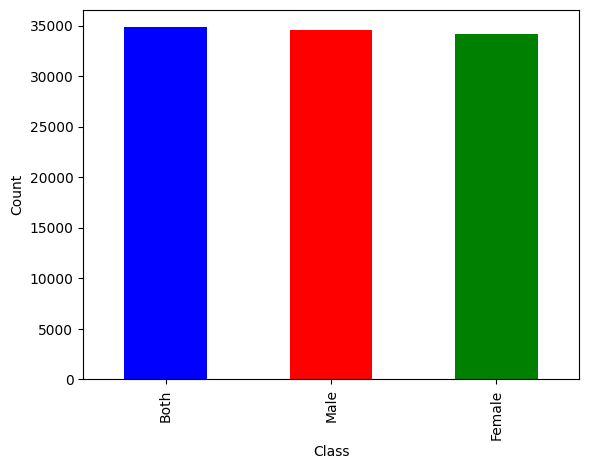

In [22]:
import matplotlib.pyplot as plt

df['Preference'].value_counts().plot(kind='bar', color=['blue', 'red', 'green'])
# plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

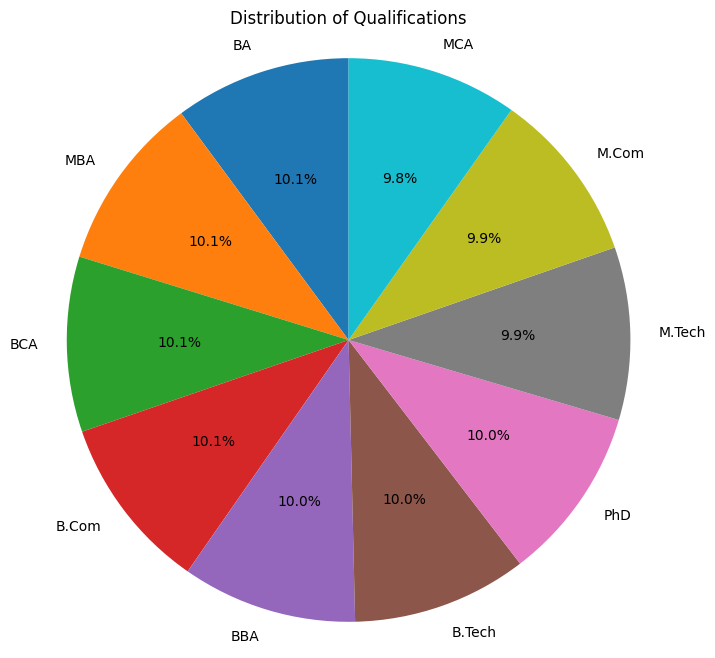

In [24]:


import matplotlib.pyplot as plt

# Assuming 'Qualifications' is a column in your DataFrame 'df'
qualification_counts = df['Qualifications'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(qualification_counts, labels=qualification_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Qualifications')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [33]:
# prompt: count how many job roles and job title are there

job_role_count = df['Role'].nunique()
job_title_count = df['Job Title'].nunique()
job_company_count = df['Company'].nunique()

print(f"Number of unique roles: {job_role_count}")
print(f"Number of unique job titles: {job_title_count}")
print(f"Number of unique companies: {job_title_count}")


Number of unique roles: 376
Number of unique job titles: 147
Number of unique companies: 147


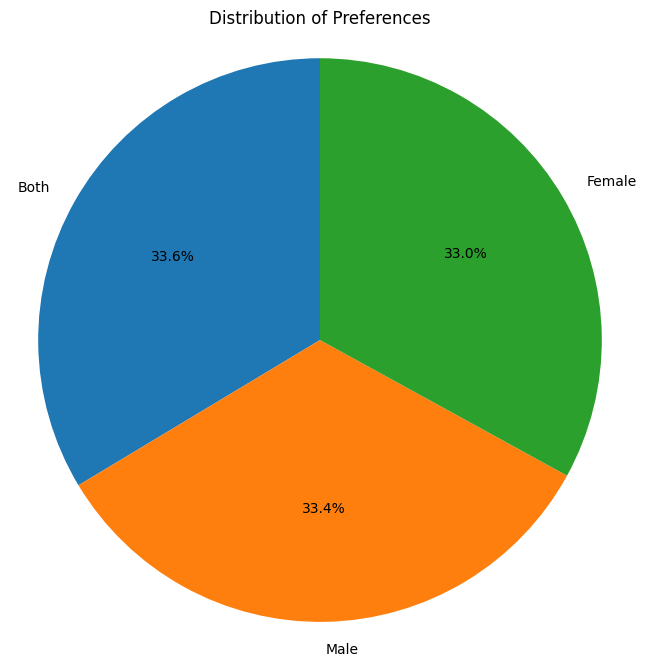

In [30]:
# prompt: make pie chart using pyplot for Preference

preference_counts = df['Preference'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(preference_counts, labels=preference_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Preferences')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


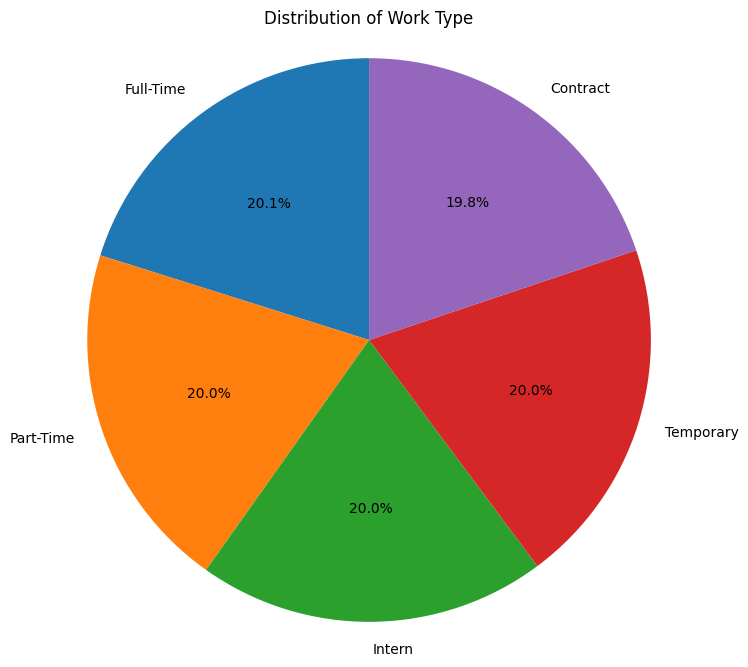

In [34]:
# prompt: make a pie chart using pylplot of Work Type

import matplotlib.pyplot as plt

work_type_counts = df['Work Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(work_type_counts, labels=work_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Work Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [36]:
df.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')

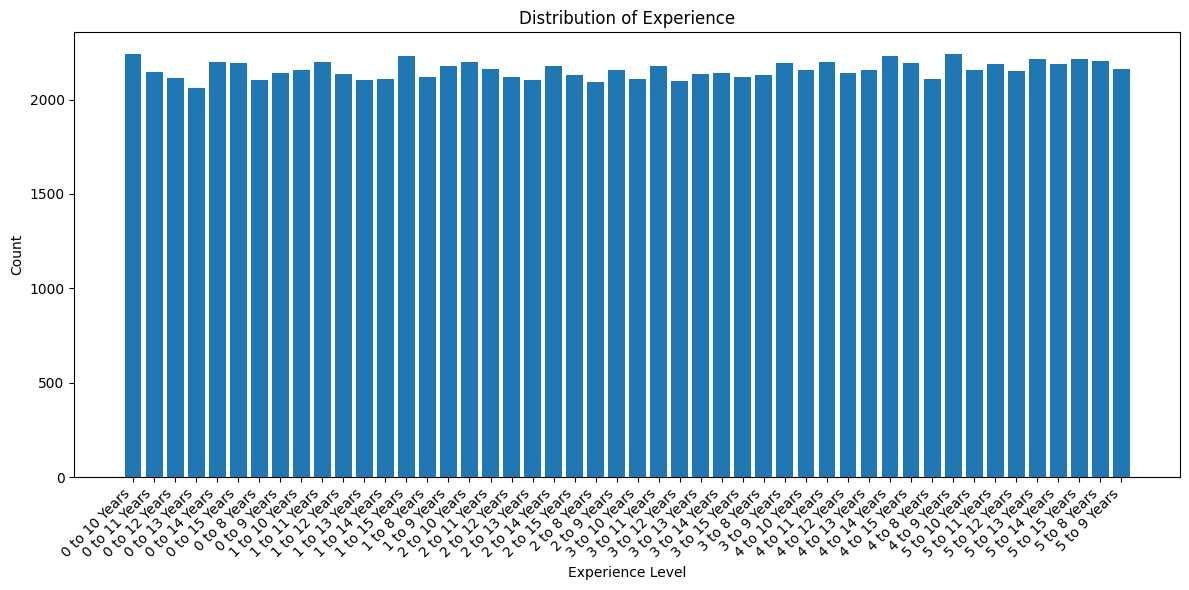

In [42]:
# prompt: Using Pyplot make barchart from left to right I mean the y axis will be x axis for Experience. Make gap 10px between bar more so that levels are not overlape

import matplotlib.pyplot as plt

# Assuming 'Experience' is a column in your DataFrame 'df'
experience_counts = df['Experience'].value_counts().sort_index()

# Create a bar chart with custom width and spacing
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
bar_width = 0.8
bar_spacing = 10  # Adjust the spacing between bars as needed

plt.bar(experience_counts.index, experience_counts.values, width=bar_width)

# Customize the chart
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Distribution of Experience')

# Set x-axis ticks and labels
plt.xticks(experience_counts.index, rotation=45, ha='right')

# Add spacing between bars
plt.tight_layout()


plt.show()


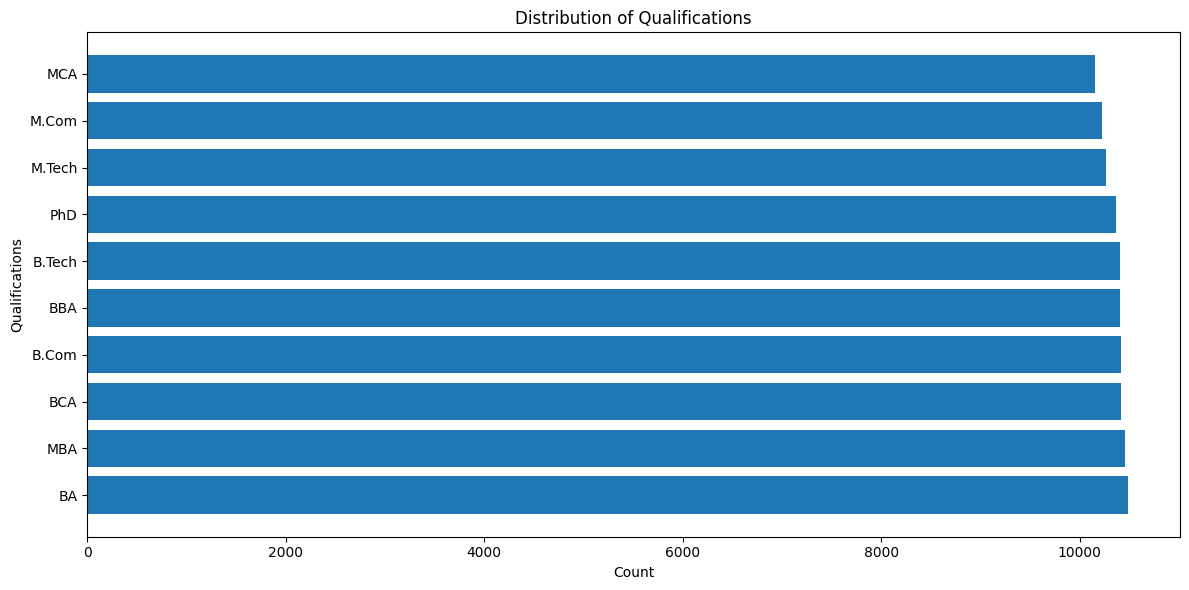

In [43]:
# prompt: Using Pyplot make barchart from left to right I mean the y axis will be x axis for Qualifications. Make gap 10px between bar more so that levels are not overlape

import matplotlib.pyplot as plt

# Assuming 'Qualifications' is a column in your DataFrame 'df'
qualification_counts = df['Qualifications'].value_counts()

# Create a horizontal bar chart with custom width and spacing
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
bar_width = 0.8
bar_spacing = 10  # Adjust the spacing between bars as needed

# Create the bar chart with horizontal orientation
plt.barh(qualification_counts.index, qualification_counts.values, height=bar_width)

# Customize the chart
plt.xlabel('Count')
plt.ylabel('Qualifications')
plt.title('Distribution of Qualifications')

# Set x-axis ticks and labels
#plt.xticks(qualification_counts.index, rotation=45, ha='right')

# Add spacing between bars
plt.tight_layout()

plt.show()


In [44]:
# prompt: count each qualifications

# Assuming 'Qualifications' is a column in your DataFrame 'df'
qualification_counts = df['Qualifications'].value_counts()

print(qualification_counts)


Qualifications
BA        10487
MBA       10461
BCA       10419
B.Com     10413
BBA       10405
B.Tech    10405
PhD       10365
M.Tech    10266
M.Com     10225
MCA       10157
Name: count, dtype: int64


In [47]:
# prompt: Do level Encoding for each level in dataset and show in a table

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame
for column in df.columns:
  # Check if the column's data type is object (categorical)
  if df[column].dtype == 'object':
    # Fit and transform the column using LabelEncoder
    df[column] = label_encoder.fit_transform(df[column])

# Display the DataFrame with encoded values
print(df)


                  Job Id  Experience  Qualifications  Salary Range  location  \
0       1089843540111562          45               6           254        59   
1        398454096642776          18               4            67        11   
2        481640072963533           2               9           310       102   
3        688192671473044          33               9           552       152   
4        117057806156508          10               7           497       172   
...                  ...         ...             ...           ...       ...   
103956  2047754616069280           7               8           315        81   
103957   238086201272145          15               2           483       108   
103958      469166369709          33               6           508        87   
103959   755769123082209          46               6           396       172   
103960  1950208792290670          38               9           241       108   

        Country  latitude  longitude  W

In [48]:
df.shape

(103603, 26)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103603 entries, 0 to 103960
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Job Id                  103603 non-null  int64  
 1   Experience              103603 non-null  int64  
 2   Qualifications          103603 non-null  int64  
 3   Salary Range            103603 non-null  int64  
 4   location                103603 non-null  int64  
 5   Country                 103603 non-null  int64  
 6   latitude                103603 non-null  float64
 7   longitude               103603 non-null  float64
 8   Work Type               103603 non-null  int64  
 9   Company Size            103603 non-null  float64
 10  Job Posting Date        103603 non-null  int64  
 11  Preference              103603 non-null  int64  
 12  Contact Person          103603 non-null  int64  
 13  Contact                 103603 non-null  int64  
 14  Job Title               1

** Feature Engineering**

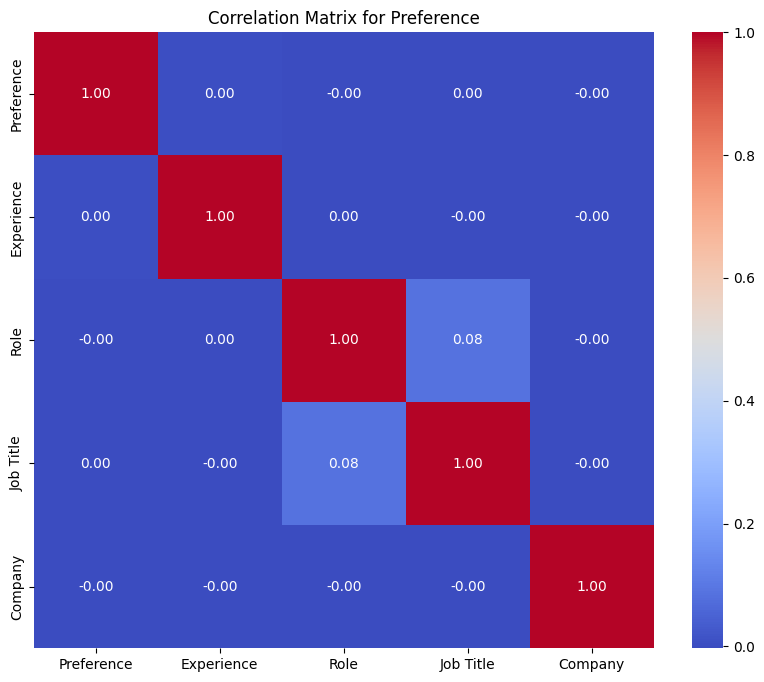

In [51]:
# prompt: find co relation for Preference and make heatmap using pyplot

correlation_matrix = df[['Preference', 'Experience', 'Role', 'Job Title', 'Company']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Preference')
plt.show()


In [52]:
df.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile',
       'Experience_encoded', 'Qualifications_encoded', 'Role_encoded'],
      dtype='object')

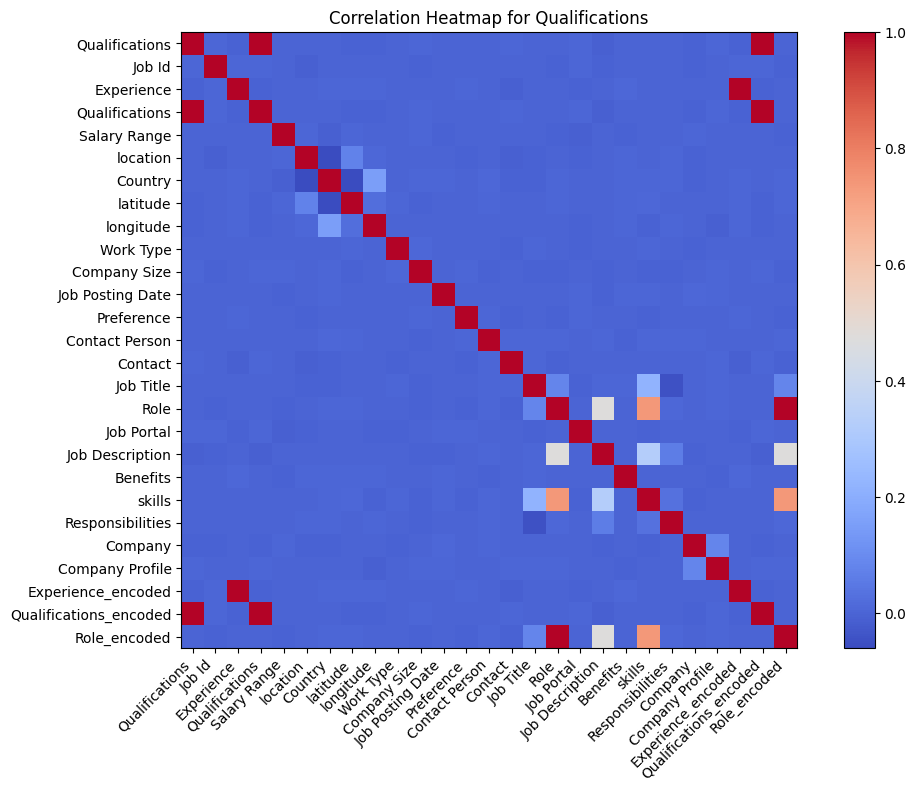

In [53]:
# prompt: find co relation for Qualifications and make heatmap using pyplot

# Assuming 'Qualifications' is a column in your DataFrame 'df'
# and you want to find the correlation between 'Qualifications' and other numerical features.

# Select the numerical features you want to analyze the correlation with 'Qualifications'
numerical_features = df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for 'Qualifications' and other numerical features
correlation_matrix = df[['Qualifications'] + list(numerical_features)].corr()

# Create a heatmap using matplotlib.pyplot
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap for Qualifications')
plt.show()
